In [2]:
import numpy as np
import matplotlib.pyplot as plt
from Classic_DeepRL import DeepRLClassic
from cop_car_ctrm import CopCarCTRM
from cop_car import CopCarEnv
from fire_fighter_ctrm import FireFighterCTRM
from Firfighter import  FireFighterEnv
from counterfactualDeepRL import DeepRLCounterFactual
from concurrent.futures import ThreadPoolExecutor

In [3]:
#Cop Car environment (max rows and columns is 7)
rows = 7
columns = 7
probability = 0.9
environment = CopCarEnv(rows= rows, cols= columns, probability= probability)
#Cop Car CTRM 
ctrm = CopCarCTRM()
Gamma = 0.001
num_episodes = 400000
episode_length = 50
UPDATE_FREQUENCY = 100
threshold = 0.85
iterations = 1
decay_rate = 0.05
max_episodes = 750000

In [5]:
# Perform value iteration to get the actual value of the objective
from value_iteration import ValueIteration
vi = ValueIteration(gamma = Gamma, environment = environment, ctrm = ctrm )
Value = vi.doVI()
print(Value)

0.2774221080849127


In [4]:
# sum = []
# all_runs_data_classic = [] 
# for i in range(10):
#     print("Run:", i)
#     RL_classic = DeepRLClassic(Gamma=Gamma, number_of_episodes=num_episodes, max_episode_length= episode_length, UPDATE_FREQUENCY= UPDATE_FREQUENCY, env= environment, ctrm= ctrm, decay_rate = decay_rate )
#     classic_data = RL_classic.doRL()
#     all_runs_data_classic.append(classic_data)
# average_results_classic = [0] * len(all_runs_data_classic[0])
# for i in range(len(all_runs_data_classic[0])):
#     sum_val = 0
#     for j in range(len(all_runs_data_classic)):
#         sum_val += all_runs_data_classic[j][i]
#     average_results_classic[i] = sum_val / len(all_runs_data_classic)
#     average_results_classic[i] /= Value   
# print(average_results_classic)


sum = []
all_runs_data_classic = [] 
for i in range(iterations):
    print("Run:", i)
    RL_classic = DeepRLClassic(Gamma=Gamma, number_of_episodes=num_episodes, max_episode_length= episode_length, UPDATE_FREQUENCY= UPDATE_FREQUENCY, env= environment, ctrm= ctrm, decay_rate = decay_rate)
    classic_data = RL_classic.doRLwithconvergence(Value, threshold, max_episodes = max_episodes)
    all_runs_data_classic.append(classic_data)

length = 0
for i in range (iterations):
    length = max(length, len(all_runs_data_classic[i]))
for sub_array in all_runs_data_classic:
    if len(sub_array) < length:
        # Extend the sub-array to reach the desired length. Use the last element if available, or 0 if empty.
        sub_array.extend([sub_array[-1]] * (length - len(sub_array)) if sub_array else [0] * length)




average_results_classic = [0] * length
print(f"Completed, Number of iterations is {len(all_runs_data_classic[0])} and the number of episodes is {len(all_runs_data_classic)}")
for i in range (iterations):
    print(f"iteration {i}: {all_runs_data_classic[i]}")
for i in range(length):
    sum_val = 0
    num_iter = 0
    for j in range(iterations):
            sum_val += all_runs_data_classic[j][i]
    average_results_classic[i] = sum_val / iterations
    average_results_classic[i] /= Value   
print(average_results_classic)



Run: 0
Completed, Number of iterations is 114 and the number of episodes is 1
iteration 0: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.016869088640179813, 0.01574448273083449, 0.014760452560157336, 0.027784381289707925, 0.026240804551390818, 0.024859709575001828, 0.0354250861443776, 0.04498423637381283, 0.05367437294602668, 0.06160884546848279, 0.06888211194740089, 0.07557351710800556, 0.08175019879471755, 0.08746934850463607, 0.09277998752098897, 0.09772437557069685, 0.1023391377504242, 0.1066561733379111, 0.11070339420118004, 0.1145053289515236, 0.1180836204812587, 0.12145743820929467, 0.12464382161910642, 0.12765796808784727, 0.13051347526875964, 0.1332225461839842, 0.13579616355344754, 0.13824423861220533, 0.14057573866816514, 0.14279879686105706, 0.14492080695427206, 0.14694850548778862, 0.14888804321550014, 0.15074504742288347, 0.15252467645495918, 0.15423166756735834, 0.15587037903526152, 0.15744482730834497, 0.1589587198786175, 0.16041548442737036, 0.161

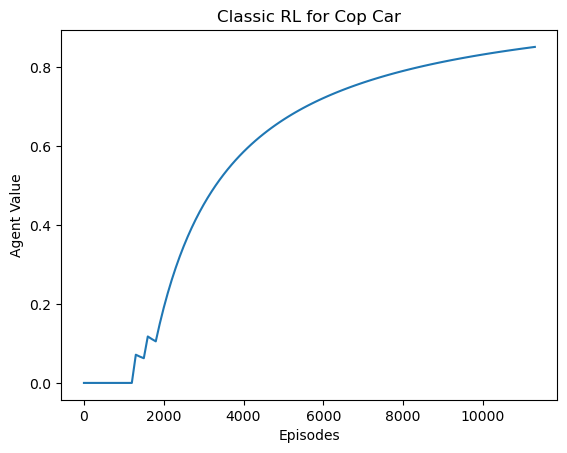

In [5]:
plt.plot(np.arange(len(average_results_classic)) * UPDATE_FREQUENCY, average_results_classic)
plt.xlabel('Episodes')
plt.ylabel('Agent Value')
plt.title('Classic RL for Cop Car')
plt.show()

In [6]:
# sum = []
# all_runs_data_counter = [] 
# for i in range(10):
#     RL_counterfactual = DeepRLCounterFactual(Gamma=Gamma, number_of_episodes= num_episodes, max_episode_length= episode_length, UPDATE_FREQUENCY= UPDATE_FREQUENCY,  env= environment, ctrm= ctrm, decay_rate = decay_rate )
#     counterfactual_data = RL_counterfactual.doRL()
#     all_runs_data_counter.append(counterfactual_data)
# average_results_counter = [0] * len(all_runs_data_counter[0])
# for i in range(len(all_runs_data_counter[0])):
#     sum_val = 0
#     for j in range(len(all_runs_data_counter)):
#         sum_val += all_runs_data_counter[j][i]
#     average_results_counter[i] = sum_val / len(all_runs_data_counter)
#     average_results_counter[i] /= Value
# print(average_results_counter)


sum = []
all_runs_data_counter = [] 
for i in range(iterations):
    print("Run:", i)
    RL_counterfactual = DeepRLCounterFactual(Gamma=Gamma, number_of_episodes= num_episodes, max_episode_length= episode_length, UPDATE_FREQUENCY= UPDATE_FREQUENCY,  env= environment, ctrm= ctrm, decay_rate = decay_rate )
    counterfactual_data = RL_counterfactual.doRLwithconvergence(Value, threshold, max_episodes = max_episodes)
    all_runs_data_counter.append(counterfactual_data)

length = 0
for i in range (iterations):
    length = max(length, len(all_runs_data_counter[i]))
average_results_counter = [0] * length

for sub_array in all_runs_data_counter:
    if len(sub_array) < length:
        # Extend the sub-array to reach the desired length. Use the last element if available, or 0 if empty.
        sub_array.extend([sub_array[-1]] * (length - len(sub_array)) if sub_array else [0] * length)

for i in range(length):
    sum_val = 0
    num_iter = 0
    for j in range(iterations):
        if i < len(all_runs_data_counter[j]):
            num_iter += 1
            sum_val += all_runs_data_counter[j][i]
    average_results_counter[i] = sum_val / num_iter
    average_results_counter[i] /= Value
print(average_results_counter)

Run: 0
[0.0, 0.5, 0.3333333333333333, 0.25, 0.2, 0.16666666666666666, 0.14285714285714285, 0.125, 0.1111111111111111, 0.1, 0.09090909090909091, 0.08333333333333333, 0.07692307692307693, 0.14285714285714285, 0.2, 0.25, 0.29411764705882354, 0.3333333333333333, 0.3684210526315789, 0.39999999999999997, 0.42857142857142855, 0.4545454545454546, 0.4782608695652174, 0.5000000000000001, 0.5200000000000001, 0.5384615384615385, 0.5555555555555556, 0.5714285714285715, 0.5862068965517242, 0.6000000000000001, 0.6129032258064517, 0.6250000000000001, 0.6363636363636365, 0.6470588235294119, 0.6571428571428574, 0.6666666666666669, 0.6756756756756759, 0.6842105263157897, 0.6923076923076925, 0.7000000000000003, 0.7073170731707319, 0.7142857142857145, 0.7209302325581398, 0.7272727272727275, 0.7333333333333336, 0.739130434782609, 0.7446808510638301, 0.7500000000000003, 0.7551020408163269, 0.7600000000000003, 0.7647058823529415, 0.7692307692307696, 0.7735849056603777, 0.777777777777778, 0.7818181818181821, 0

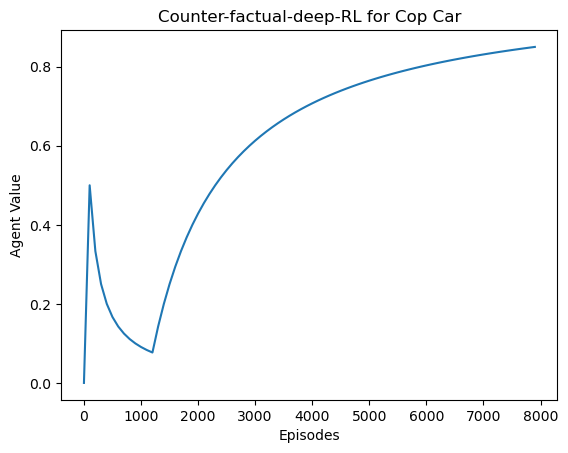

In [7]:
plt.plot(np.arange(len(average_results_counter)) * UPDATE_FREQUENCY, average_results_counter)
plt.xlabel('Episodes')
plt.ylabel('Agent Value')
plt.title('Counter-factual-deep-RL for Cop Car')
plt.show()

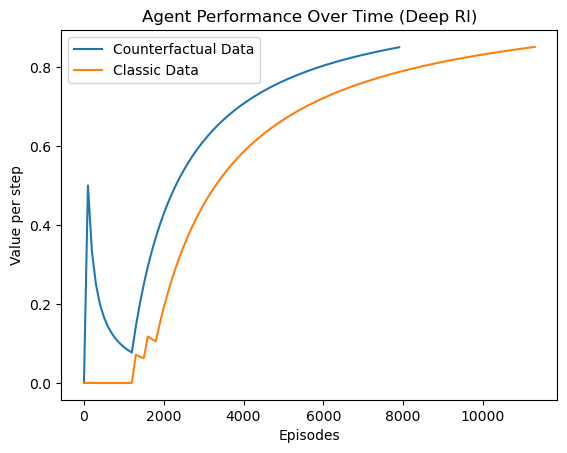

In [8]:
plt.plot(np.arange(len(average_results_counter)) * UPDATE_FREQUENCY, average_results_counter, label='Counterfactual Data')

# Plot classic data
plt.plot(np.arange(len(average_results_classic)) * UPDATE_FREQUENCY, average_results_classic, label='Classic Data')

# Adding labels and title
plt.xlabel('Episodes')
plt.ylabel('Value per step')
plt.title('Agent Performance Over Time (Deep Rl)')

# Adding a legend to clarify which line corresponds to which dataset
plt.legend()

# Show the plot
plt.show()

In [18]:
from TabularLearning import DynamicQLearning
from TabularLearningCounterFactual import DynamicQLearningCounterFactual
Gamma = 0.001
num_episodes = 100000
episode_length = 40
alpha = 0.01
UPDATE_FREQUENCY = 2


In [13]:
# sum = []
# all_runs_data_classic = [] 
# for i in range(10):
#     tabularlearning = DynamicQLearning(alpha = alpha, gamma = Gamma, UPDATE_FREQUENCY= UPDATE_FREQUENCY, environment= environment, ctrm = ctrm, decay_rate = decay_rate)
#     tabular_data = tabularlearning.train( num_episodes = num_episodes, max_episode_length = episode_length )    
#     all_runs_data_classic.append(tabular_data)
# average_results_classic = [0] * len(all_runs_data_classic[0])
# for i in range(len(all_runs_data_classic[0])):
#     sum_val = 0
#     for j in range(len(all_runs_data_classic)):
#         sum_val += all_runs_data_classic[j][i]
#     average_results_classic[i] = sum_val / len(all_runs_data_classic)
#     average_results_classic[i] /= Value
# print(average_results_classic)


sum = []
all_runs_data_classic = [] 
for i in range(iterations):
    print("Run:", i)
    tabularlearning = DynamicQLearning(alpha = alpha, gamma = Gamma, UPDATE_FREQUENCY= UPDATE_FREQUENCY, environment= environment, ctrm = ctrm, decay_rate = decay_rate)
    tabular_data = tabularlearning.trainwithconvergence( num_episodes = num_episodes, max_episode_length = episode_length, value = Value, threshold = threshold, max_episodes = max_episodes )    
    all_runs_data_classic.append(tabular_data)


length = 0
for i in range (iterations):
    length = max(length, len(all_runs_data_classic[i]))
average_results_classic = [0] * length
for sub_array in all_runs_data_classic:
    if len(sub_array) < length:
        # Extend the sub-array to reach the desired length. Use the last element if available, or 0 if empty.
        sub_array.extend([sub_array[-1]] * (length - len(sub_array)) if sub_array else [0] * length)

for i in range(length):
    sum_val = 0
    num_iter = 0
    for j in range(iterations):
        if i < len(all_runs_data_classic[j]):
            sum_val += all_runs_data_classic[j][i]
    average_results_classic[i] = sum_val / iterations
    average_results_classic[i] /= Value
print(average_results_classic)



Run: 0
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

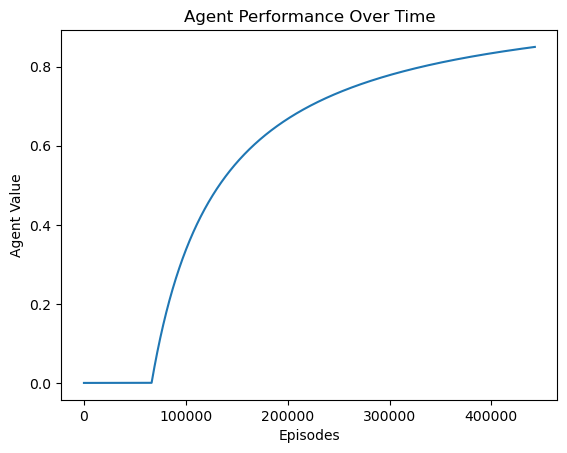

In [14]:
plt.plot(np.arange(len(average_results_classic)) * UPDATE_FREQUENCY, average_results_classic)
plt.xlabel('Episodes')
plt.ylabel('Agent Value')
plt.title('Agent Performance Over Time')
plt.show()

In [15]:
# sum = []
# all_runs_data_counter = [] 
# for i in range(10):
#     tabularlearningcounter = DynamicQLearningCounterFactual(alpha = alpha, gamma = Gamma, UPDATE_FREQUENCY= UPDATE_FREQUENCY, environment= environment, ctrm = ctrm)
#     tabular_data_counter = tabularlearningcounter.train( num_episodes = num_episodes, max_episode_length = episode_length )
#     all_runs_data_counter.append(tabular_data_counter)
# average_results_counter = [0] * len(all_runs_data_counter[0])
# for i in range(len(all_runs_data_counter[0])):
#     sum_val = 0
#     for j in range(len(all_runs_data_counter)):
#         sum_val += all_runs_data_counter[j][i]
#     average_results_counter[i] = sum_val / len(all_runs_data_counter)
#     average_results_counter[i] /= Value
# print(average_results_counter)


sum = []
all_runs_data_counter = [] 
for i in range(iterations):
    print("Run:", i)
    tabularlearningcounter = DynamicQLearningCounterFactual(alpha = alpha, gamma = Gamma, UPDATE_FREQUENCY= UPDATE_FREQUENCY, environment= environment, ctrm = ctrm, decay_rate = decay_rate)
    tabular_data_counter = tabularlearningcounter.trainwithconvergence( num_episodes = num_episodes, max_episode_length = episode_length, value = Value, threshold = threshold, max_episodes = max_episodes )
    all_runs_data_counter.append(tabular_data_counter)

length = 0
for i in range (iterations):
    length = max(length, len(all_runs_data_counter[i]))
average_results_counter = [0] * length

for sub_array in all_runs_data_counter:
    if len(sub_array) < length:
        # Extend the sub-array to reach the desired length. Use the last element if available, or 0 if empty.
        sub_array.extend([sub_array[-1]] * (length - len(sub_array)) if sub_array else [0] * length)


for i in range(length):
    sum_val = 0
    num_iter = 0
    for j in range(iterations):
        if i<len(all_runs_data_counter[j]):
            sum_val += all_runs_data_counter[j][i]
    average_results_counter[i] = sum_val / iterations
    average_results_counter[i] /= Value
print(average_results_counter)

Run: 0
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

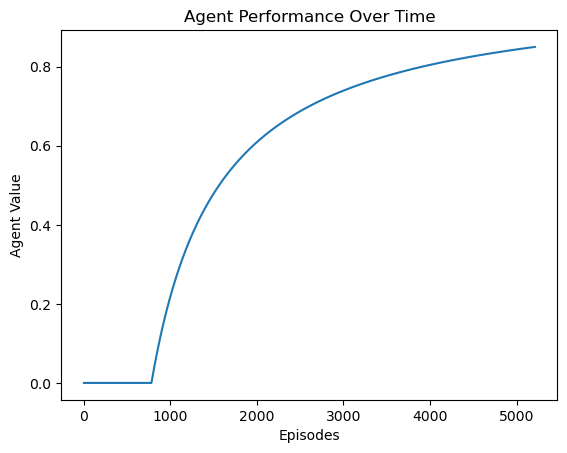

In [16]:
plt.plot(np.arange(len(average_results_counter)) * UPDATE_FREQUENCY, average_results_counter)
plt.xlabel('Episodes')
plt.ylabel('Agent Value')
plt.title('Agent Performance Over Time')
plt.show()

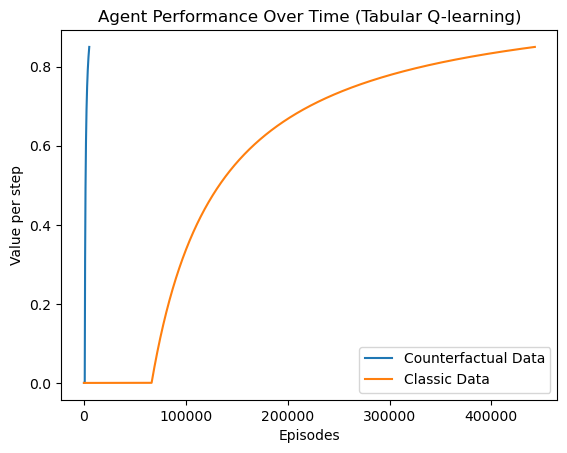

In [17]:
plt.plot(np.arange(len(average_results_counter)) * UPDATE_FREQUENCY, average_results_counter, label='Counterfactual Data')

# Plot classic data
plt.plot(np.arange(len(average_results_classic)) * UPDATE_FREQUENCY, average_results_classic, label='Classic Data')

# Adding labels and title
plt.xlabel('Episodes')
plt.ylabel('Value per step')
plt.title('Agent Performance Over Time (Tabular Q-learning)')

# Adding a legend to clarify which line corresponds to which dataset
plt.legend()

# Show the plot
plt.show()